In [1]:
import nltk
from nltk.corpus import stopwords

nltk.download('book')
nltk.download('stopwords')

stop_words = stopwords.words('english')

from nltk.book import *
from nltk.tokenize import word_tokenize

from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re

%matplotlib inline

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\alanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\alanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\alanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\alanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\alanv\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\alanv\AppData\R

In [2]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [3]:
print(len(text1))
print(text1.tokens[:10])

260819
['[', 'Moby', 'Dick', 'by', 'Herman', 'Melville', '1851', ']', 'ETYMOLOGY', '.']


## Medida de riqueza lexica en un texto: 
$$ R_l = \frac{\text{total de palabras únicas}}{\text{total de palabras}} = \frac{\text{longitud del vocabulario}}{\text{longitud del texto}}$$ 

In [4]:
def lexical_affluence(corpus):
    vocabulary = sorted(set(corpus))
    return len(vocabulary) / len(corpus)

texts = [ i for i in dir(nltk.book) if re.search(r'text\d', i)]
for text in texts:
    exec(compile(f'print({text}.name, "\\n", round(100*lexical_affluence({text}),3), "%", "\\n" )', 
        '', 'exec'))


Moby Dick by Herman Melville 1851 
 7.406 % 

Sense and Sensibility by Jane Austen 1811 
 4.826 % 

The Book of Genesis 
 6.23 % 

Inaugural Address Corpus 
 6.618 % 

Chat Corpus 
 13.477 % 

Monty Python and the Holy Grail 
 12.766 % 

Wall Street Journal 
 12.325 % 

Personals Corpus 
 22.766 % 

The Man Who Was Thursday by G . K . Chesterton 1908 
 9.835 % 



In [5]:
def word_percentage(word, corpus):
    count = 0
    transforms = { 
        word,
        word.lower(),
        word.upper(),
        word.capitalize()
    }

    for transform in transforms:
        count += corpus.count(transform)

    return count / len(corpus)

'{:.2%}'.format(word_percentage('the', text1))

'5.53%'

# Estadistica del Lenguaje

Los cálculos estadísticos más simples que se pueden efectuar sobre un texto o un corpus son los relacionados con frecuencia de aparición de palabras.

* Podemos construir un diccionario en Python donde las llaves sean las palabras y los valores sean las frecuencias de ocurrencias de esas palabras.

* ejemplo `dic = {'monster': 49 ,  'boat': 54,  ...}`


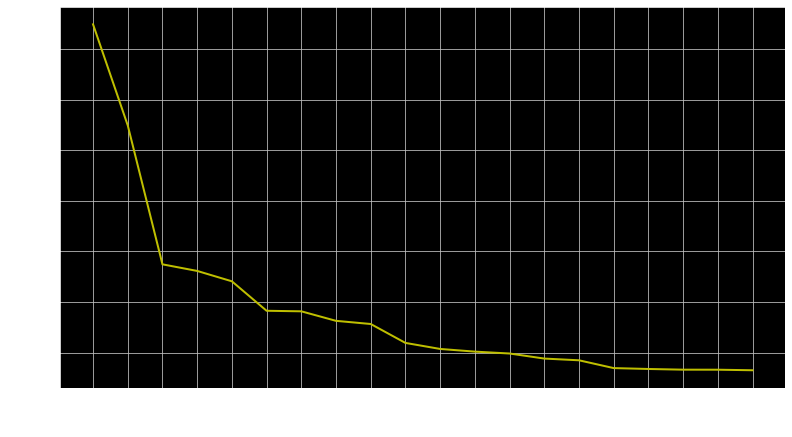

In [6]:
fdist = FreqDist(text1)
plt.figure(figsize=(13,7))

fdist.plot(20, c='y')


In [7]:
fdist['the']

13721

In [8]:
fdist['The']

612

# Optimizando estadisticas

In [9]:
def fdist(corpus):
    pattern = r'\w+(?:-\w+)*'
    search = re.compile(pattern)

    lower = [word.lower() for word in corpus]
    counts = Counter(lower)

    for word, count in counts.items():
        if not search.search(word):
            continue

        if word not in stop_words:
            yield word, count

In [10]:
lower = [word.lower() for word in text1]
counts = Counter(lower)
len(counts)

17231

In [11]:
dtypes = [('word', 'U15'), ('frequency', int)]
words = np.array( list(fdist(text1)), dtype=dtypes )

len(words)
words[:10]

array([('moby', 84), ('dick', 84), ('herman',  1), ('melville',  1),
       ('1851',  3), ('etymology',  1), ('supplied', 12), ('late', 30),
       ('consumptive',  1), ('usher',  2)],
      dtype=[('word', '<U15'), ('frequency', '<i4')])

In [12]:
words = np.sort(words, order='frequency')[::-1]
words[:10]

array([('whale', 1226), ('one',  921), ('like',  647), ('upon',  566),
       ('man',  527), ('ship',  518), ('ahab',  511), ('ye',  472),
       ('sea',  455), ('old',  450)],
      dtype=[('word', '<U15'), ('frequency', '<i4')])

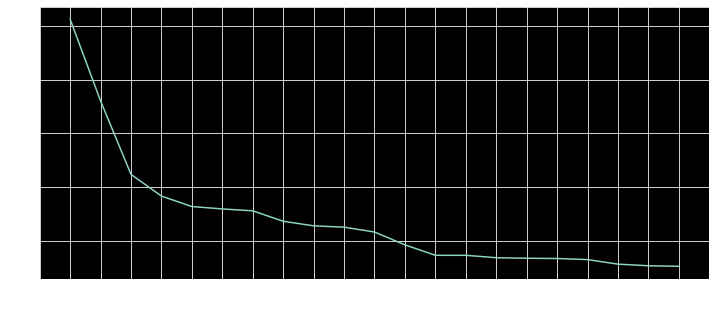

In [13]:
n_words = 21
x, y = zip(*words[:n_words])

plt.figure(figsize=(12,5))

plt.plot(x, y)

plt.xticks(x, rotation=60)
plt.grid()
plt.show()